In [27]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [28]:
#Load the dataset
df = pd.read_csv('data.csv')
print(df.head())

   time time_code        country country_code           GDP  \
0  2024    YR2024  United States          USA  2.920000e+13   
1  2023    YR2023  United States          USA  2.770000e+13   
2  2022    YR2022  United States          USA  2.600000e+13   
3  2021    YR2021  United States          USA  2.370000e+13   
4  2019    YR2019  United States          USA  2.150000e+13   

   education_expenditure_pencent  \
0                            NaN   
1                            NaN   
2                            NaN   
3                      90.401039   
4                      90.424759   

   education_government_expenditure_percent_GDP  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                       5.42038   
4                                       4.95747   

   education_school_enrollment_preprimary_percent  \
0                                           

In [29]:
#Drop non-numeric or identifier columns
df = df.drop(['time','time_code','country','country_code'],axis=1)
df.describe()

,GDP,education_expenditure_pencent,education_government_expenditure_percent_GDP,education_school_enrollment_preprimary_percent,education_school_enrollment_pprimary_percent,education_school_enrollment_secondary_percent,education_school_enrollment_tertiary_percent,health_expenditure_percent_GDP,health_hospital_beds_perThousandPeople,health_nurses_midwives_perThousandPeople,...,labor_advanced_education_percent,labor_basic_education_percent,labor_intermediate_education_percent,labor_force_total,labor_unemployment_percent_ILO,labor_unemployment_percent_national,trade_tourism_arrival,trade_tourism_receipts,trade_tariffs_applied_simple_mean,trade_tariffs_applied_weighted_mean
count,1.163200e+04,1810.000000,5139.000000,6190.000000,6969.000000,5862.000000,4996.000000,4382.000000,4725.000000,3098.000000,...,2410.000000,2419.000000,2416.000000,6.571000e+03,6383.000000,4986.000000,4.695000e+03,4.182000e+03,3784.000000,3784.000000
mean,2.304629e+11,90.718045,4.312730,50.383864,96.675385,66.634246,28.350640,6.268877,4.165945,5.031100,...,78.515218,48.351642,65.549787,1.682008e+07,8.117882,7.998067,1.174758e+07,6.408328e+09,8.767130,7.162534
std,1.299867e+12,7.802662,2.188892,35.131741,22.630107,35.487819,28.164310,2.880778,3.380180,4.142952,...,7.417813,15.981763,9.573296,6.643206e+07,6.090847,6.087546,5.686495e+07,2.701591e+10,7.035233,10.122726
min,2.585956e+06,32.809990,0.000000,0.000000,6.887230,0.000000,0.000000,1.107200,0.100000,0.048000,...,30.952000,12.621000,23.108000,1.681200e+04,0.100000,0.039000,7.000000e+02,1.000000e+05,0.000000,0.000000
25%,1.446632e+09,88.448425,2.975890,17.656725,91.850861,35.638602,4.388250,4.165788,1.620000,1.562500,...,75.190250,36.977000,60.978750,8.863985e+05,3.633000,3.888500,3.265000e+05,1.560000e+08,3.247500,2.240000
50%,7.926664e+09,92.292698,4.165300,49.003578,100.767768,73.023739,17.938234,5.665533,3.200000,4.281000,...,79.483000,48.294000,66.211000,3.066119e+06,6.344000,6.490500,1.278000e+06,7.545000e+08,7.555000,5.175000
75%,5.177820e+10,95.434130,5.337865,80.324184,107.890991,95.655064,47.849299,8.027678,5.840000,7.159750,...,83.121750,59.509500,71.504250,9.089572e+06,11.074000,10.328750,5.049000e+06,3.579250e+09,12.380000,10.040000
max,2.920000e+13,100.000000,66.900307,245.847183,214.642624,164.079819,166.665649,24.230690,40.315456,27.060000,...,100.000000,100.000000,100.000000,7.811879e+08,38.800000,57.000000,9.688734e+08,4.320000e+11,105.360000,421.500000


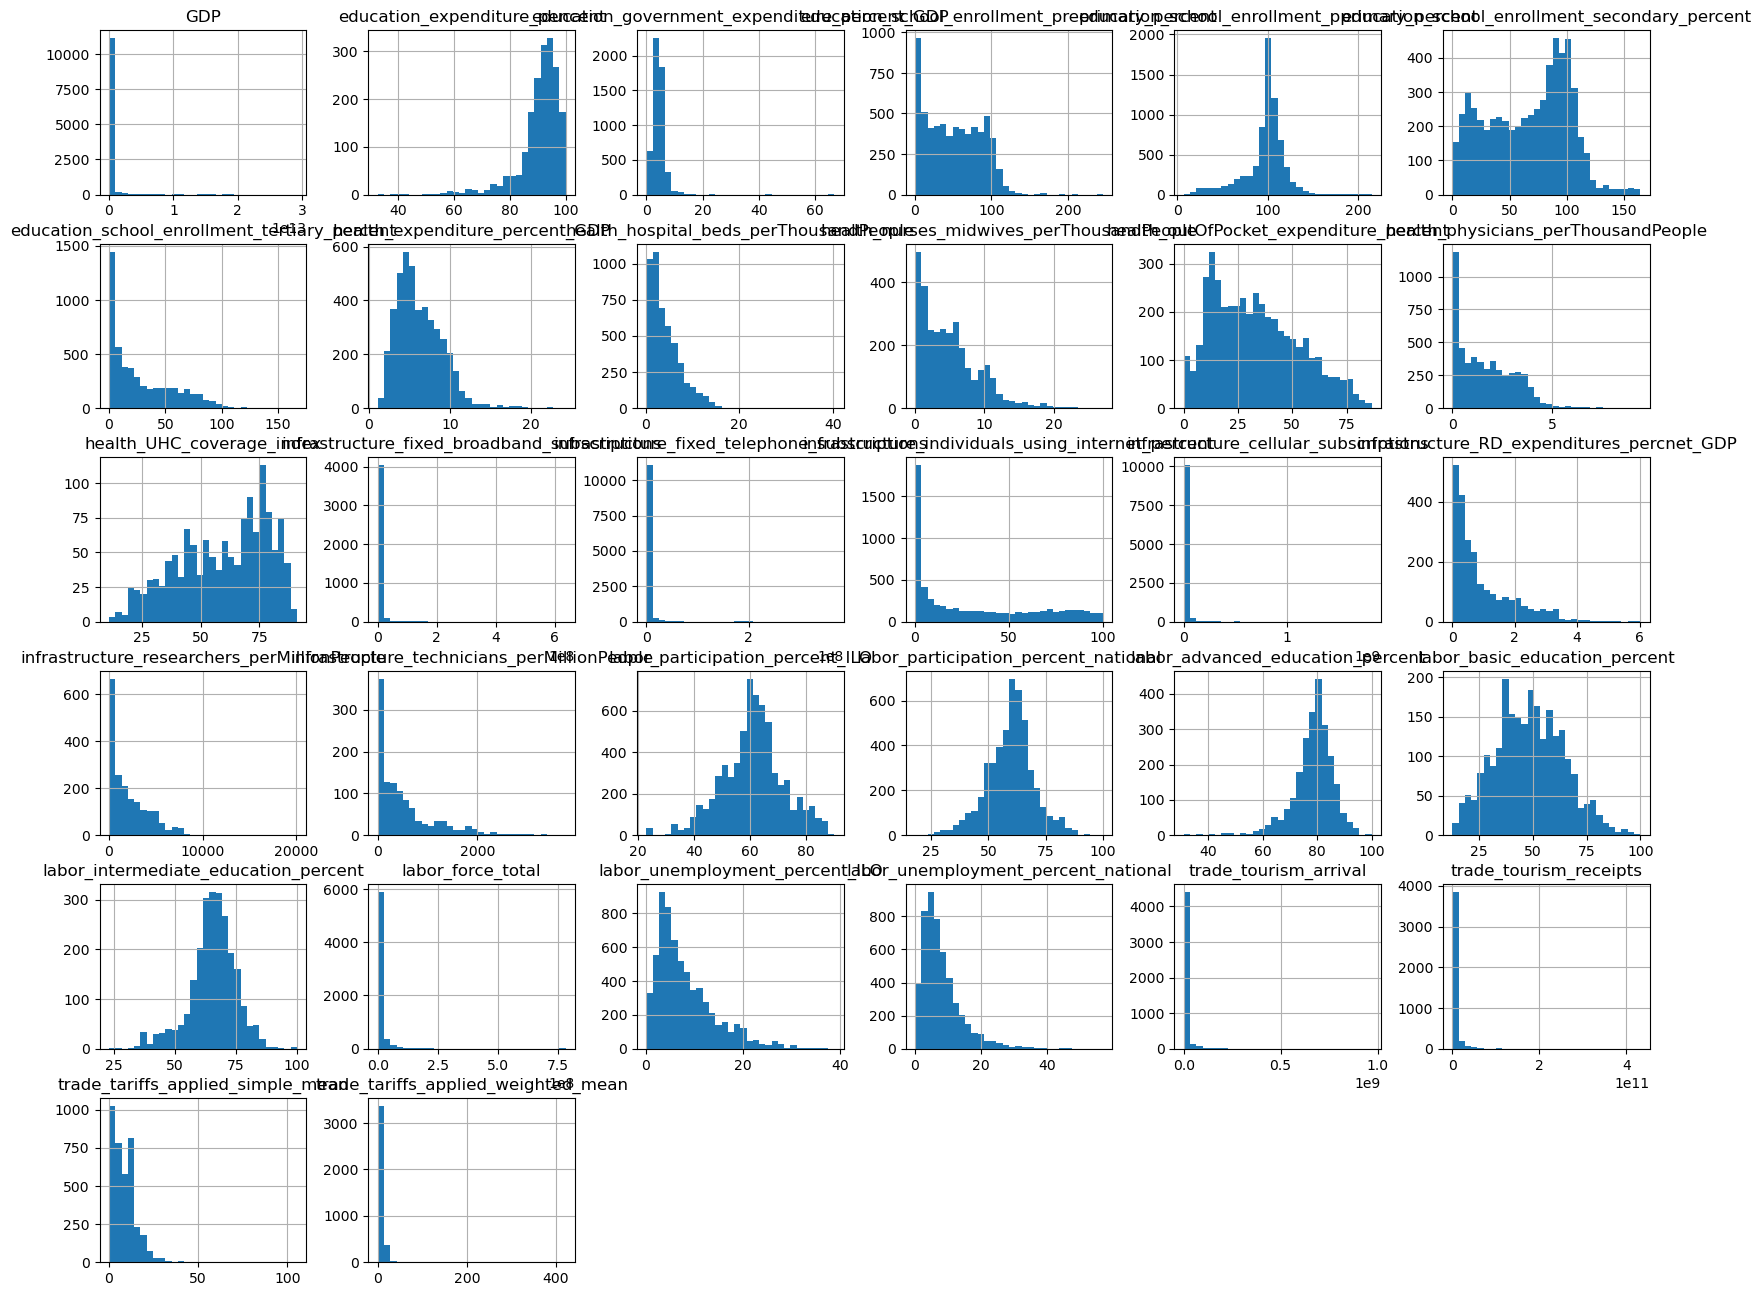

In [30]:
#Create a histogram to visually inspect the distribution of each feature
df.hist(bins=30, figsize=(20,16))
plt.show()

In [31]:
#Using a correlation matrix to identify features that are strongly correlated with GDP
corr_matrix = df.corr()
corr_matrix['GDP'].sort_values(ascending = False)

GDP                                                  1.000000
trade_tourism_receipts                               0.883258
infrastructure_fixed_telephone_subscriptions         0.790337
infrastructure_fixed_broadband_subscriptions         0.733199
trade_tourism_arrival                                0.704328
infrastructure_cellular_subscriptions                0.621429
labor_force_total                                    0.501591
infrastructure_RD_expenditures_percnet_GDP           0.377460
health_expenditure_percent_GDP                       0.275397
education_school_enrollment_tertiary_percent         0.248312
infrastructure_technicians_perMillionPeople          0.233120
health_UHC_coverage_index                            0.223197
health_nurses_midwives_perThousandPeople             0.199429
infrastructure_researchers_perMillionPeople          0.194236
infrastructure_individuals_using_internet_percent    0.191295
education_school_enrollment_secondary_percent        0.179242
educatio

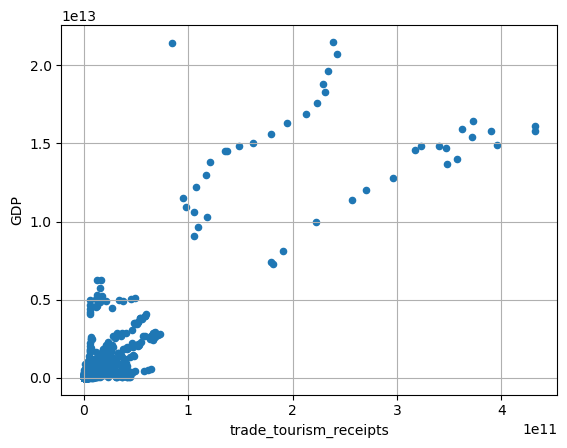

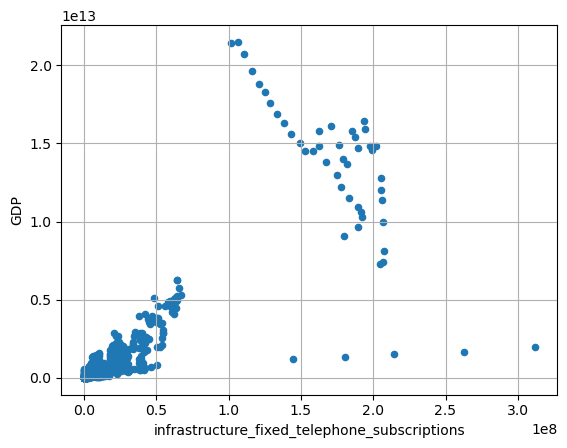

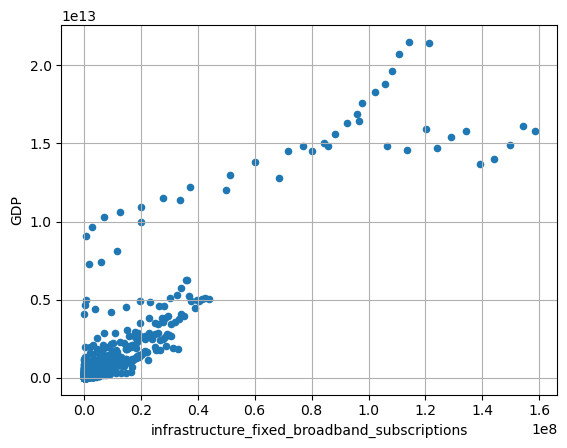

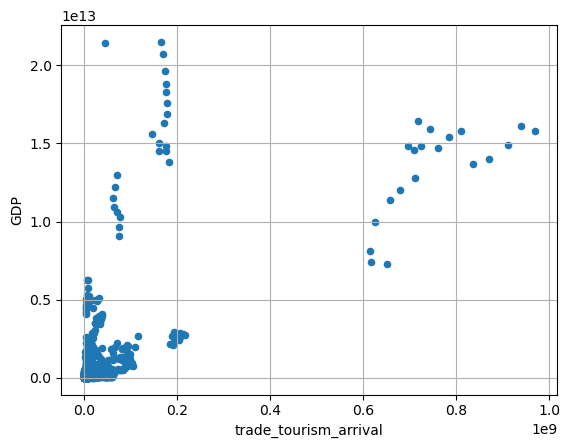

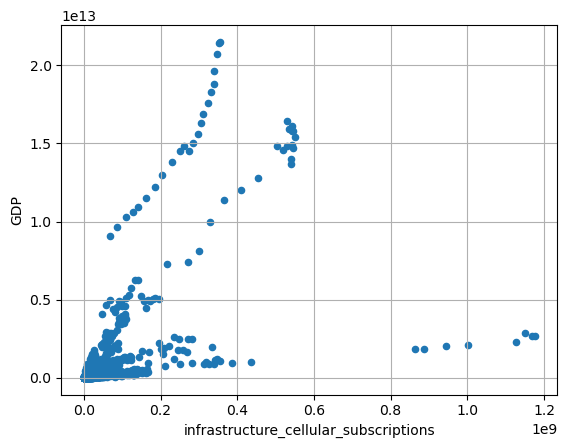

In [32]:
#Based on the correlation matrix, trade_tourism_receipts appears to be strongly correlated with GDP
#Create a scatter plot to visualize the relationship between trade_tourism_receipts and GDP
df = df[['trade_tourism_receipts','infrastructure_fixed_telephone_subscriptions', 'infrastructure_fixed_broadband_subscriptions','trade_tourism_arrival','infrastructure_cellular_subscriptions' ,'GDP']]
df = df.dropna()
df.plot(kind="scatter", x="trade_tourism_receipts", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_fixed_telephone_subscriptions", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_fixed_broadband_subscriptions", y="GDP", grid=True)
df.plot(kind="scatter", x="trade_tourism_arrival", y="GDP", grid=True)
df.plot(kind="scatter", x="infrastructure_cellular_subscriptions", y="GDP", grid=True)
plt.show()


In [33]:
#Train a linear regression model using trade_tourism_receipts as the predictor for GDP
X = df.drop("GDP", axis=1)
y = df['GDP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Evaluate the model's performance
linear_train_pred = linear_model.predict(X_train)
linear_test_pred = linear_model.predict(X_test)

from sklearn.metrics import root_mean_squared_error, r2_score
linear_rmse_train = root_mean_squared_error(y_train, linear_train_pred)
print(linear_rmse_train)
linear_rmse_test = root_mean_squared_error(y_test, linear_test_pred)
print(linear_rmse_test)

linear_r2 = r2_score(y_test, linear_test_pred)
print(linear_r2)


469901321199.45184
540245802384.4919
0.928614102209991


930059494727.0316
824797375176.9924
0.8336111715598484


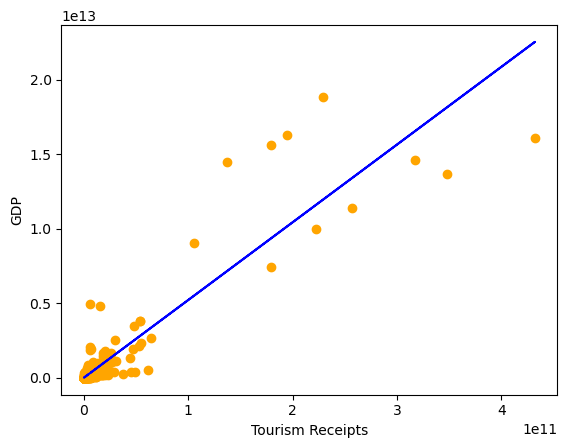

In [ ]:
#Train a linear regression model using only trade_tourism_receipts as the predictor for GDP
X_tourism_train = X_train[['trade_tourism_receipts']]
X_tourism_test = X_test[['trade_tourism_receipts']]

linear_tourism_model = LinearRegression()
linear_tourism_model.fit(X_tourism_train, y_train)

tourism_test_pred = linear_tourism_model.predict(X_tourism_test)
tourism_train_pred = linear_tourism_model.predict(X_tourism_train)

tourism_rmse_train = root_mean_squared_error(y_train, tourism_train_pred)
print(tourism_rmse_train)
tourism_rmse_test = root_mean_squared_error(y_test, tourism_test_pred)
print(tourism_rmse_test)

r2_tourism = r2_score(y_test, tourism_test_pred)
print(r2_tourism)

plt.scatter(X_tourism_test, y_test, color='orange')
plt.plot(X_tourism_test, tourism_test_pred, color="blue")
plt.xlabel("Tourism Receipts")
plt.ylabel("GDP")
plt.show()